<a href="https://colab.research.google.com/github/hafilmr/LearningCodeTrainee/blob/main/ARIMA/ARIMA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Auto ARIMA

Although ARIMA is a very powerful model for forecasting time series data, the data preparation and parameter tuning processes end up being really time consuming. Before implementing ARIMA, you need to make the series stationary, and determine the values of p and q using the plots we discussed above. Auto ARIMA makes this task really simple for us as it eliminates steps 3 to 6 we saw in the previous section

### Get Data

Data that we used is airline_passengers.csv

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2022-02-04 08:03:56--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2022-02-04 08:03:56 (27.7 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



In [ ]:
# Import Librart
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Install Libarry `pmdarima` for using Auto ARIMA

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.6 MB/s 
     |████████████████████████████████| 9.8 MB 40.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read Data

In [ ]:
# import numpy as 
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [ ]:
df['LogPassengers'] = np.log(df['Passengers'])
df.head()

,Passengers,LogPassengers
Month,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


### Split Data

In [ ]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [ ]:
import pmdarima as pm

### Describe Model using Auto ARIMA

We're going to call the auto Arima function, OK, so what are these arguments?

In [ ]:
model = pm.auto_arima(train['Passengers'], # data that one should be obvious.
                      trace=True, # set this to true so that we can see which models auto
                      surpress_warnings=True, # set the true, for make sure that those warnings are not printed out.
                      seasonal=True, # to fit a full seasonal Arima model
                      m=12) #  set them equal to 12 since we know that the seasonal period is 12

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=5.66 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.45 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.11 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.40 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.45 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.90 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.32 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.63 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.17 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.45 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC

So basically, this is going to tell you the orders of the best model and other information, such as the AIC, the Bisi log likelihood and the P values of various statistical tests.

You can also see the value of each parameter in the model and whether or not there are statistically significant.


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Fri, 04 Feb 2022   AIC                            905.686
Time:                                    08:22:19   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

It looks like our best model is `AR` three for the non seasonal part and for the seasonal part, all it does is the first difference.

Remember that this is the first seasonal difference.

So instead of subtracting from one time step behind, it's subtracting from 12 times steps behind.

You might actually want to try that in code to see if the result looks stationary.

Also note that this is a much more parsimonious model than the non seasonal Arima we found earlier, which was in a Arima 12 one zero.

This model has only three dates and one intercept.

### Process Train and Test Models with Auto ARIMA

#### USING PASSENGERS DATA

In [ ]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

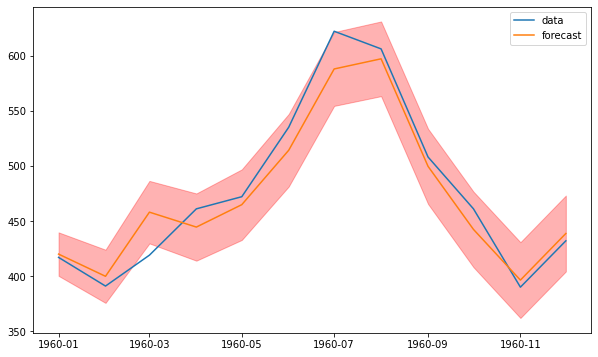

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha = 0.3)
ax.legend();

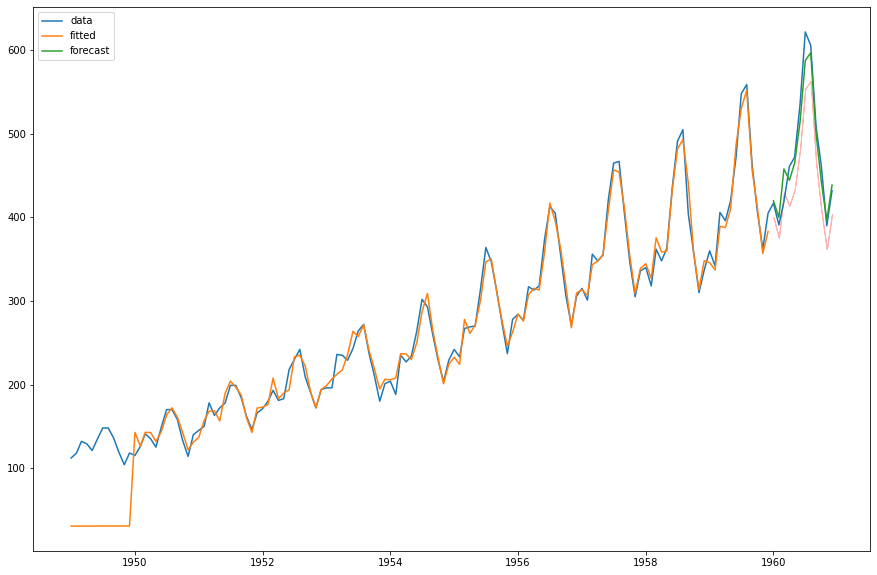

In [ ]:
# call the function model, predict in sample.
train_pred = model.predict_in_sample(start=0, end=-1)
# start equals zero and end equals minus one to get the full training predictions.
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:, 0], confint[:, 0], \
                color='red', alpha = 0.3)
ax.legend()


Both the training predictions and the forecasts look pretty good.

One weird part about this graph is the beginning, where all we see is a flat line. since we now have a seasonal model, it's not possible to make predictions for the first few times step. 

This is due to the fact that we require values from a one season behind which don't exist.

#### USING LOG PASSENGERS DATA

In [ ]:
logmodel = pm.auto_arima(train['LogPassengers'], # data that one should be obvious.
                      trace=True, # set this to true so that we can see which models auto
                      surpress_warnings=True, # set the true, for make sure that those warnings are not printed out.
                      seasonal=True, # to fit a full seasonal Arima model
                      m=12) #  set them equal to 12 since we know that the seasonal period is 12

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-440.663, Time=3.79 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=1.79 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.64 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.326, Time=2.16 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=1.09 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.329, Time=5.82 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.716, Time=2.05 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.55 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.502, Time=1.88 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.55 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-441.068, Time=2.15 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.512, Time=7.94 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [ ]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Fri, 04 Feb 2022   AIC                           -448.052
Time:                                      08:41:05   BIC                           -434.114
Sample:                                           0   HQIC                          -442.392
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.155      0.031       0.002       0.037
ar.L1          0.5997      0.083      7.263      0.000       0.438       0.762
ar.L2          0.2422      0.085      2.858      0.004       0.076       0.408
ma.S.L12      -0.5683      0.105     -5.436      0.000      -0.773      -0.363
sigma2         0.0012      0.000      8.194      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.07
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Now we have two auto regressive coefficients and one seasonal moving average coefficient.

Again, we do seasonal differences rather than normal seasonal difference in.


In [ ]:
df['LogPassengers']

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: LogPassengers, Length: 144, dtype: float64

In [ ]:
test['LogPassengers']

Month
1960-01-01    6.033086
1960-02-01    5.968708
1960-03-01    6.037871
1960-04-01    6.133398
1960-05-01    6.156979
1960-06-01    6.282267
1960-07-01    6.432940
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: LogPassengers, dtype: float64

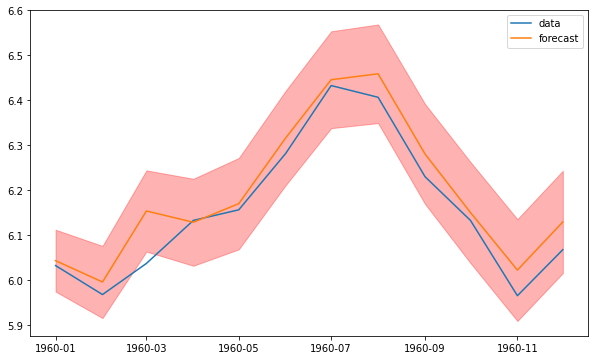

In [ ]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha = 0.3)
ax.legend();

[Text(0.5, 1.0, 'Train Pred Log')]

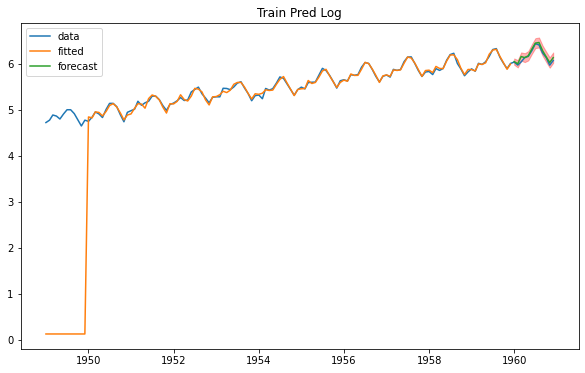

In [ ]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend();
ax.set(title='Train Pred Log')

So the plot is kind of hard to see, since the first few values stretch all the way down to zero,you could block this if you wanted, but I'm not going to bother.


In [ ]:
# forecast RMSE
def rmse(t, y):
  return np.sqrt(np.mean((t - y)**2))

### RMSE

In [ ]:
print('Non-Logged RMSE:', rmse(test['Passengers'], test_pred))
print('Logged RMSE:', rmse(test['Passengers'], np.exp(test_pred_log)))

Non-Logged RMSE: 18.536468964799457
Logged RMSE: 23.051734622075276


### Non Seasonal Auto ARIMA MODELS

In [ ]:
# Non seasonal
# For parameter, read documentation on website
model = pm.auto_arima(train['LogPassengers'],
                      trace=True,
                      suppress_warnings=True,
                      max_p=12, #The maximum value of p, inclusive. Must be a positive integer
                      max_q=2, #The maximum value of q, inclusive. Must be a positive integer
                      max_order=14, #Maximum value of p+q+P+Q if model selection is not stepwise. If the sum of p and q is >= max_order
                      stepwise=False,
                      # (STEPWISE)This controls whether we use an intelligent algorithm to search the hyper parameter space or 
                      # if you use a naive grid, search the default value for this is true.
                      seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.300, Time=0.52 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.41 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-250.956, Time=0.72 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept  

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 227.055
Date:                Fri, 04 Feb 2022   AIC                           -424.111
Time:                        08:52:43   BIC                           -380.983
Sample:                             0   HQIC                          -406.586
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0067      0.006      1.135      0.256      -0.005       0.018
ar.L1          0.0313      0.090      0.345      0.730      -0.146       0.209
ar.L2         -0.0725      0.070     -1.042      0.297      -0.209       0.064
ar.L3         -0.0440      0.067     -0.657      0.511      -0.175       0.087
ar.L4         -0.1116      0.073     -1.533      0.125      -0.254       0.031
ar.L5          0.0144      0.066      0.218      0.827      -0.115       0.144
ar.L6         -0.0607      0.067     -0.904      0.366      -0.192       0.071
ar.L7         -0.0549      0.073     -0.748      0.455      -0.199       0.089
ar.L8         -0.1148      0.068     -1.693      0.091      -0.248       0.018
ar.L9          0.0115      0.078      0.148      0.883      -0.141       0.164
ar.L10        -0.0837      0.066     -1.265      0.206      -0.213       0.046
ar.L11         0.0044      0.073      0.060      0.952      -0.138       0.147
ar.L12         0.7920      0.064     12.468      0.000       0.667       0.916
ma.L1         -0.3414      0.128     -2.659      0.008      -0.593      -0.090
sigma2         0.0016      0.000      6.989      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 2.56
Prob(Q):                              0.79   Prob(JB):                         0.28
Heteroskedasticity (H):               0.36   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

[Text(0.5, 1.0, 'Test Pred Log Model (Non Seasonal)')]

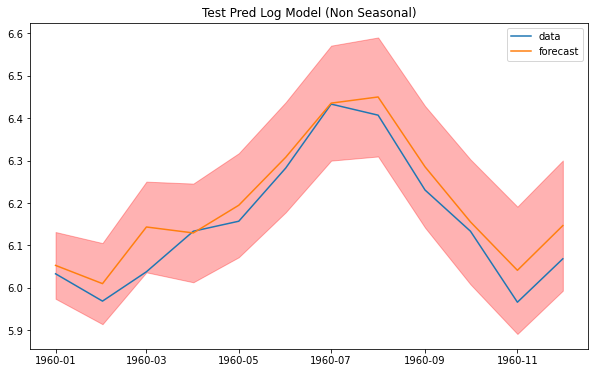

In [ ]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()
ax.set(title='Test Pred Log Model (Non Seasonal)')

[Text(0.5, 1.0, 'Train Pred Log Model (Non Seasonal)')]

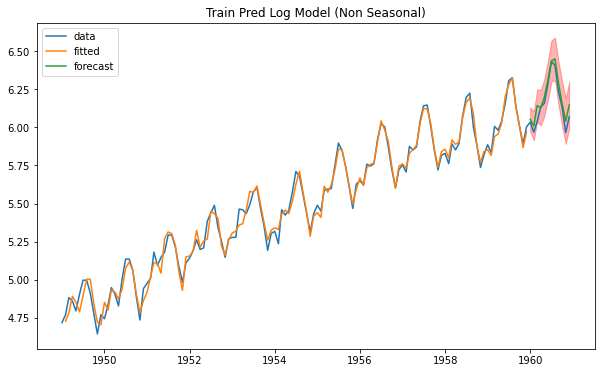

In [ ]:
train_pred = model.predict_in_sample(start=1, end=-1)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()
ax.set(title='Train Pred Log Model (Non Seasonal)')

Based on the plot.
This looks so great, forecast, fitted can match very clearly with real dataset

In [ ]:
rmse(test['Passengers'], np.exp(test_pred))

23.84864030869433